# Análise de um dataset sobre a pandemia do coronavírus

#### Dataset: https://www.kaggle.com/datasets/whenamancodes/covid-19-coronavirus-pandemic-dataset

#### Decidi fazer um estudo com um dataset sobre o coronavírus devido o impacto mundial que causou a pandemia. 
##### Download do arquivo .csv em 15 de novembro de 2022.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../data/Covid_Live.csv')

In [3]:
data.head()

,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   #                  230 non-null    int64  
 1   Country,
Other     230 non-null    object 
 2   Total
Cases        230 non-null    object 
 3   Total
Deaths       225 non-null    object 
 4   New
Deaths         3 non-null      float64
 5   Total
Recovered    214 non-null    object 
 6   Active
Cases       215 non-null    object 
 7   Serious,
Critical  147 non-null    object 
 8   Tot Cases/
1M pop  228 non-null    object 
 9   Deaths/
1M pop     223 non-null    object 
 10  Total
Tests        214 non-null    object 
 11  Tests/
1M pop      214 non-null    object 
 12  Population         228 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 23.5+ KB


In [5]:
data.dtypes

#                       int64
Country,\nOther        object
Total\nCases           object
Total\nDeaths          object
New\nDeaths           float64
Total\nRecovered       object
Active\nCases          object
Serious,\nCritical     object
Tot Cases/\n1M pop     object
Deaths/\n1M pop        object
Total\nTests           object
Tests/\n1M pop         object
Population             object
dtype: object

### Formato deste dataframe

In [6]:
print(f"Número de linhas: {data.shape[0]}\n"
f"Número de colunas: {data.shape[1]}")

Número de linhas: 230
Número de colunas: 13


##### Retirando a coluna "#" devido a não utilidade para a análise


In [7]:
data.drop(["#"], axis =1, inplace = True)

#### Renomeando as colunas para melhor entendimento


In [8]:
data.columns = ["pais", "total_casos", "total_obitos", "obitos_recentes", "total_recuperados", "casos_ativos", "estado_serio_critico", "casos_por_milhao", "obitos_por_milhao", "total_testes", "testes_por_milhao", "populacao"]

In [9]:
data.tail()

,pais,total_casos,total_obitos,obitos_recentes,total_recuperados,casos_ativos,estado_serio_critico,casos_por_milhao,obitos_por_milhao,total_testes,testes_por_milhao,populacao
225,Niue,80,NaN,NaN,80,0,NaN,"49,322",NaN,NaN,NaN,"1,622"
226,Vatican City,29,NaN,NaN,29,0,NaN,"36,295",NaN,NaN,NaN,799
227,Tuvalu,20,NaN,NaN,NaN,20,NaN,"1,658",NaN,NaN,NaN,"12,066"
228,Western Sahara,10,1,NaN,9,0,NaN,16,2,NaN,NaN,"626,161"
229,MS Zaandam,9,2,NaN,7,0,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  230 non-null    object 
 1   total_casos           230 non-null    object 
 2   total_obitos          225 non-null    object 
 3   obitos_recentes       3 non-null      float64
 4   total_recuperados     214 non-null    object 
 5   casos_ativos          215 non-null    object 
 6   estado_serio_critico  147 non-null    object 
 7   casos_por_milhao      228 non-null    object 
 8   obitos_por_milhao     223 non-null    object 
 9   total_testes          214 non-null    object 
 10  testes_por_milhao     214 non-null    object 
 11  populacao             228 non-null    object 
dtypes: float64(1), object(11)
memory usage: 21.7+ KB


In [11]:
print("Contagem de valores nulos: ")
data.isnull().sum()

Contagem de valores nulos: 


pais                      0
total_casos               0
total_obitos              5
obitos_recentes         227
total_recuperados        16
casos_ativos             15
estado_serio_critico     83
casos_por_milhao          2
obitos_por_milhao         7
total_testes             16
testes_por_milhao        16
populacao                 2
dtype: int64

###### Informações sobre o Brasil

In [37]:
data.query("pais == 'Brazil'")

,pais,total_casos,total_obitos,obitos_recentes,total_recuperados,casos_ativos,estado_serio_critico,casos_por_milhao,obitos_por_milhao,total_testes,testes_por_milhao,populacao
3,Brazil,34706757,686027.0,NaN,33838636.0,182094.0,8318.0,161162.0,3186.0,63776166.0,296146.0,215353593.0


###### Estatísticas gerais

In [31]:
data.describe()

,total_casos,total_obitos,obitos_recentes,total_recuperados,casos_ativos,estado_serio_critico,casos_por_milhao,obitos_por_milhao,total_testes,testes_por_milhao,populacao
count,2.300000e+02,2.250000e+02,3.0,2.140000e+02,2.150000e+02,147.000000,228.000000,223.000000,2.140000e+02,2.140000e+02,2.280000e+02
mean,2.705969e+06,2.909820e+04,18.0,2.807255e+06,5.744895e+04,270.224490,179621.846491,1197.968610,3.137011e+07,2.050888e+06,3.484620e+07
std,8.779899e+06,1.022137e+05,21.0,8.815291e+06,2.073823e+05,922.698201,182372.507626,1246.991628,1.144561e+08,3.490517e+06,1.389233e+08
min,9.000000e+00,1.000000e+00,3.0,2.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.091000e+03,7.990000e+02
25%,2.364900e+04,2.020000e+02,6.0,1.968325e+04,1.320000e+02,4.500000,16932.500000,157.500000,3.462602e+05,1.807408e+05,5.170965e+05
50%,2.037110e+05,2.179000e+03,9.0,2.250110e+05,1.246000e+03,18.000000,117976.000000,777.000000,2.172044e+06,8.717415e+05,5.816378e+06
75%,1.256286e+06,1.412200e+04,25.5,1.437441e+06,1.923950e+04,101.000000,293122.750000,1953.000000,1.267585e+07,2.345814e+06,2.254928e+07
max,9.816690e+07,1.084282e+06,42.0,9.496211e+07,2.120510e+06,8318.000000,703959.000000,6429.000000,1.118159e+09,2.200494e+07,1.448471e+09


##### Trocar as colunas de tipo object por int64 para facilitar os cálculos


In [15]:
colunas = ["total_casos", 
           "total_obitos", 
           "total_recuperados", 
           "casos_ativos",
           "estado_serio_critico", 
           "casos_por_milhao", 
           "obitos_por_milhao", 
           "total_testes", 
           "testes_por_milhao", 
           "populacao"]

In [16]:
for col in colunas:
    data[col] = data[col].str.replace(",", "")
    data[col] = pd.to_numeric(data[col], errors='coerce')         

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   pais                  230 non-null    object 
 1   total_casos           230 non-null    int64  
 2   total_obitos          225 non-null    float64
 3   obitos_recentes       3 non-null      float64
 4   total_recuperados     214 non-null    float64
 5   casos_ativos          215 non-null    float64
 6   estado_serio_critico  147 non-null    float64
 7   casos_por_milhao      228 non-null    float64
 8   obitos_por_milhao     223 non-null    float64
 9   total_testes          214 non-null    float64
 10  testes_por_milhao     214 non-null    float64
 11  populacao             228 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 21.7+ KB


In [18]:
data.isnull().sum()

pais                      0
total_casos               0
total_obitos              5
obitos_recentes         227
total_recuperados        16
casos_ativos             15
estado_serio_critico     83
casos_por_milhao          2
obitos_por_milhao         7
total_testes             16
testes_por_milhao        16
populacao                 2
dtype: int64

##### Histogramas: 
##### Verificando os testes por milhão e vendo que há nações testando mais sua população

<AxesSubplot: >

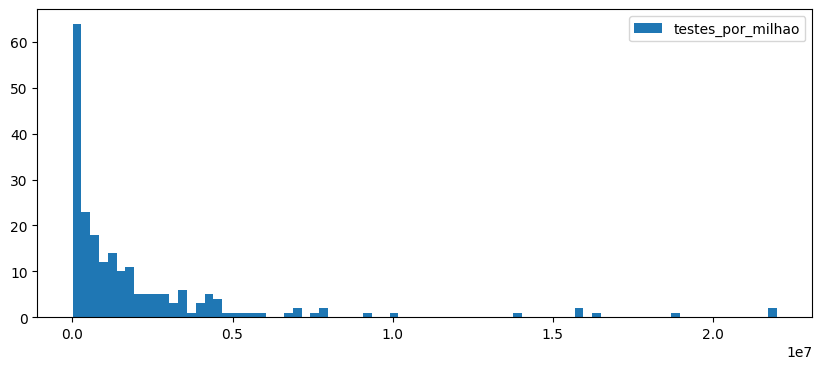

In [19]:
data["testes_por_milhao"].hist(grid=False, bins=80, legend=True, figsize=(10, 4))

##### O histograma da população é próximo dos testes por milhão

<AxesSubplot: >

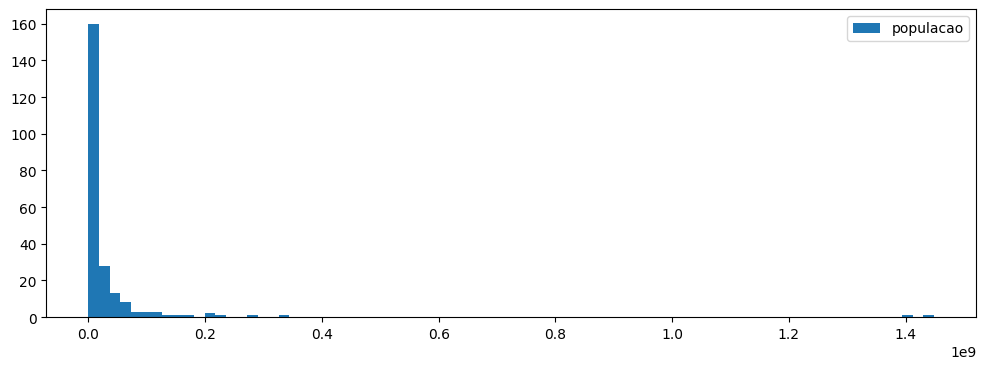

In [20]:
data["populacao"].hist(grid=False, bins=80, legend=True, figsize=(12, 4))

###### A maioria dos países tem poucos casos em estado crítico

<AxesSubplot: >

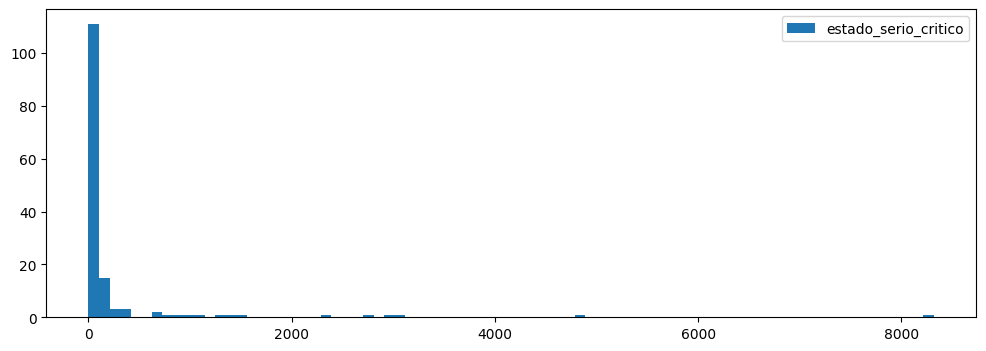

In [21]:
data["estado_serio_critico"].hist(grid=False, bins=80, legend=True, figsize=(12, 4))

##### Boxplot's

<AxesSubplot: >

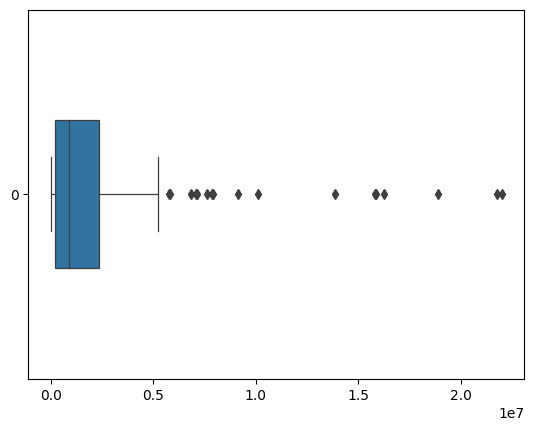

In [22]:
sns.boxplot(
    data["testes_por_milhao"], 
    orient="h",
    width=0.4,
    linewidth=0.9)

<AxesSubplot: >

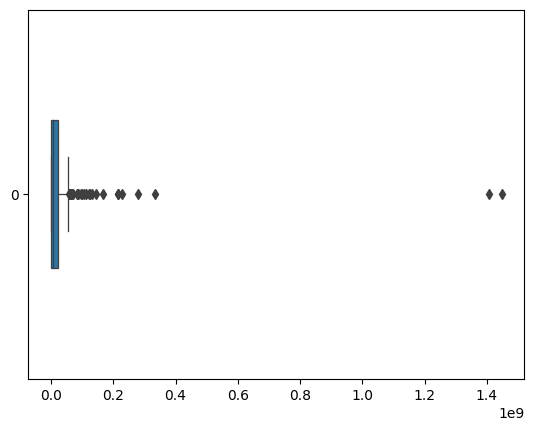

In [23]:
sns.boxplot(
    data["populacao"], 
    orient="h",
    width=0.4,
    linewidth=0.9)

<AxesSubplot: >

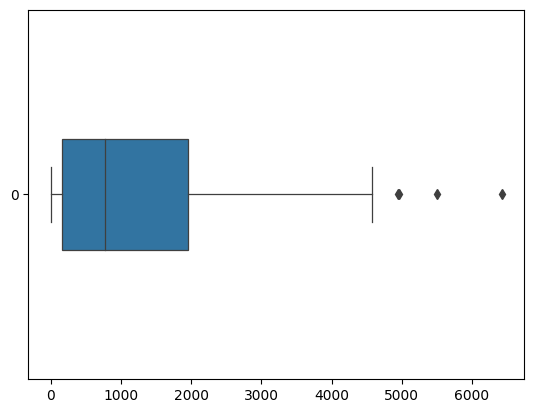

In [24]:
sns.boxplot(
    data["obitos_por_milhao"], 
    orient="h",
    width=0.3,
    linewidth=0.9)

<AxesSubplot: xlabel='testes_por_milhao', ylabel='total_testes'>

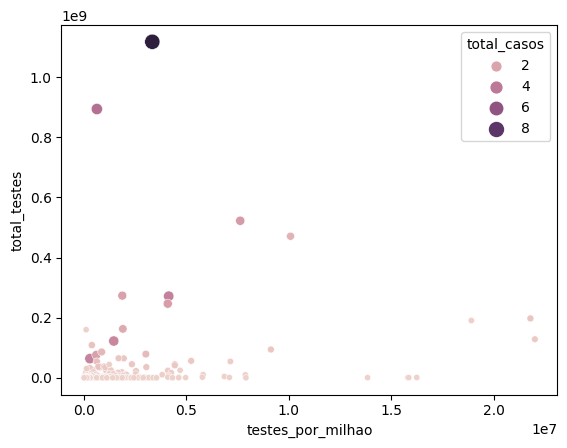

In [25]:
sns.scatterplot(x="testes_por_milhao", y="total_testes", 
                data=data, hue="total_casos", 
                size="total_casos", 
                sizes=(20, 120))

<AxesSubplot: xlabel='total_obitos', ylabel='populacao'>

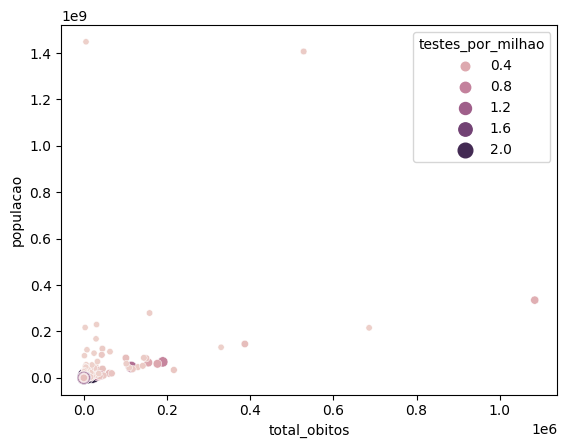

In [26]:
sns.scatterplot(x="total_obitos", y="populacao", 
                data=data, hue="testes_por_milhao",
                size="testes_por_milhao", sizes=(20, 120))

<AxesSubplot: xlabel='total_testes', ylabel='estado_serio_critico'>

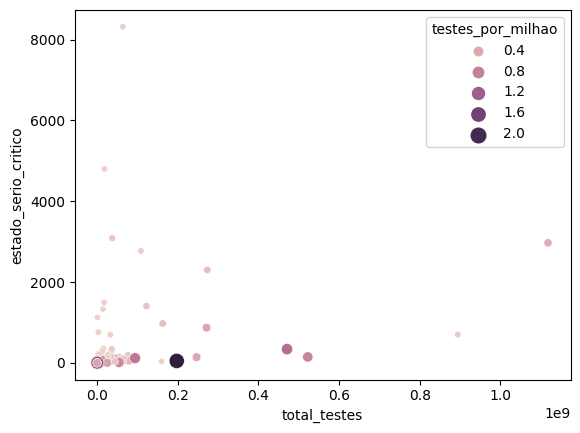

In [27]:
sns.scatterplot(x="total_testes", y="estado_serio_critico", 
                data=data, hue="testes_por_milhao",
                size="testes_por_milhao", sizes=(20, 120))

<AxesSubplot: xlabel='populacao', ylabel='testes_por_milhao'>

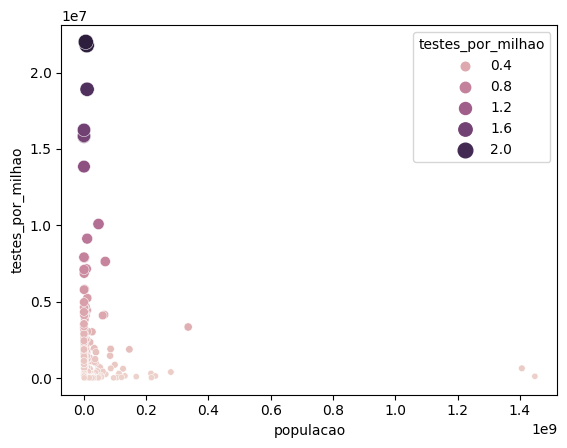

In [28]:
sns.scatterplot(x="populacao", y="testes_por_milhao", 
                data=data, hue="testes_por_milhao",
                size="testes_por_milhao", sizes=(20, 120))